In [1]:
import os

if os.getcwd() == '/Users/matildamwendwa/Desktop/Desktop - Admin’s MacBook Pro/Python_Projects/microvision/notebooks':
    os.chdir('/Users/matildamwendwa/Desktop/Desktop - Admin’s MacBook Pro/Python_Projects/microvision')
    print("Changed!!")

print("Current working directory:", os.getcwd())

os.environ["TOKENIZERS_PARALLELISM"] = "false"

Changed!!
Current working directory: /Users/matildamwendwa/Desktop/Desktop - Admin’s MacBook Pro/Python_Projects/microvision


In [2]:
from pathlib import Path
import sqlite3
import pandas as pd
import math

# Prefer configured defaults from config.settings when available
try:
    from config.settings import settings
    EDGES_DB = Path(getattr(settings, "DEFAULT_DB", "data/edges/edges.db"))
    MERGED_NODES = Path("data/merged_templates.csv")  # usually written by pipeline
except Exception:
    EDGES_DB = Path("data/edges/edges.db")
    MERGED_NODES = Path("data/merged_templates.csv")

print("Edges DB:", EDGES_DB)
print("Merged nodes CSV:", MERGED_NODES)


Edges DB: data/edges/edges.db
Merged nodes CSV: data/merged_templates.csv


In [3]:
# Cell 2: load edges (adjust limit if you want more rows)
limit = None  # set to an int to limit rows for quick inspection, or None to load all
if not EDGES_DB.exists():
    raise FileNotFoundError(f"Edges DB not found: {EDGES_DB}")

with sqlite3.connect(str(EDGES_DB)) as conn:
    # list tables
    tables = [r[0] for r in conn.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()]
    print("DB tables:", tables)
    # choose table name (common name: 'edges')
    table = "edges" if "edges" in tables else (tables[0] if tables else None)
    if table is None:
        raise RuntimeError("No table found in edges DB")
    sql = f"SELECT * FROM {table}" + (f" LIMIT {int(limit)}" if limit else "")
    edges_df = pd.read_sql_query(sql, conn)

print("Loaded edges:", len(edges_df))
print("Columns:", edges_df.columns.tolist())
display(edges_df.head(len(edges_df)))

DB tables: ['edges', 'sqlite_sequence', 'transitions']
Loaded edges: 186
Columns: ['id', 'source_index', 'source_id', 'target_id', 'source_timestamp', 'target_timestamp', 'time_delta_ms', 'retrieval_distance', 'retrieval_similarity', 'semantic_cosine', 'hybrid_score', 'alpha', 'target_metadata', 'created_at', 'source_timestamp_canonical', 'target_timestamp_canonical', 'target_semantic_text', 'target_component', 'target_service', 'source_component', 'source_service']


,id,source_index,source_id,target_id,source_timestamp,target_timestamp,time_delta_ms,retrieval_distance,retrieval_similarity,semantic_cosine,...,alpha,target_metadata,created_at,source_timestamp_canonical,target_timestamp_canonical,target_semantic_text,target_component,target_service,source_component,source_service
0,1,0,1,1,2017-05-16T17:02:41Z,2017-05-16T17:02:41Z,0.000000e+00,0.000000,1.000000,1.000000,...,0.5,"{""template_id"": ""1"", ""component"": ""nova.osapi_...",2025-11-25 21:51:50,2017-05-16T17:02:41Z,2017-05-16T17:02:41Z,req_id-id -ip post /v2/id/servers http status:...,"[""nova.osapi_compute.wsgi.server"", ""nova.metad...",nova.osapi,"[""nova.osapi_compute.wsgi.server""]",nova.osapi-compute
1,2,0,1,15,2017-05-16T17:02:41Z,2017-05-16T20:33:01Z,1.262000e+07,0.862658,0.137342,0.456394,...,0.5,"{""timestamps"": ""[\""2017-05-14T20:18:29Z\"", \""2...",2025-11-25 21:51:50,2017-05-16T17:02:41Z,2017-05-16T20:33:01Z,req_id-id -instance: id total vcpu: 16 vcpu us...,"[""nova.compute.claims""]",nova.compute,"[""nova.osapi_compute.wsgi.server""]",nova.osapi-compute
2,3,0,1,2,2017-05-16T17:02:41Z,2013-10-17T19:17:29Z,-1.129167e+11,0.880654,0.119346,0.494938,...,0.5,"{""timestamps"": ""[\""2013-10-17T00:37:16Z\"", \""2...",2025-11-25 21:51:50,2017-05-16T17:02:41Z,2013-10-17T19:17:29Z,- ipip get /openstack/ts/meta_data.json http s...,"[""nova.metadata.wsgi.server""]",nova.metadata,"[""nova.osapi_compute.wsgi.server""]",nova.osapi-compute
3,4,0,1,11,2017-05-16T17:02:41Z,2017-05-16T16:32:52Z,-1.789000e+06,1.010123,0.000000,0.559673,...,0.5,"{""template_id"": ""2"", ""service_token"": ""nova.co...",2025-11-25 21:51:50,2017-05-16T17:02:41Z,2017-05-16T16:32:52Z,req_id-id -instance: id claim successful,"[""nova.compute.claims"", ""nova.compute.manager""...",nova.compute,"[""nova.osapi_compute.wsgi.server""]",nova.osapi-compute
4,5,0,1,18,2017-05-16T17:02:41Z,2017-05-16T23:03:55Z,2.167400e+07,1.068852,0.000000,0.499678,...,0.5,"{""semantic_text"": ""req_id-id -total usable vcp...",2025-11-25 21:51:50,2017-05-16T17:02:41Z,2017-05-16T23:03:55Z,req_id-id -total usable vcpus: 16 total alloca...,"[""nova.compute.resource_tracker""]",nova.compute,"[""nova.osapi_compute.wsgi.server""]",nova.osapi-compute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,21,9,4,2017-05-16T18:28:55Z,2017-05-17T00:32:20Z,2.180500e+07,0.397786,0.602214,0.468601,...,0.5,"{""service_display"": ""Nova Virt"", ""component"": ...",2025-11-25 21:51:50,2017-05-16T18:28:55Z,2017-05-17T00:32:20Z,req_id-id -image id at /var/lib/nova/instances...,"[""nova.virt.libvirt.imagecache"", ""nova.compute...",nova.virt,"[""nova.compute.manager""]",nova.compute
182,183,21,9,5,2017-05-16T18:28:55Z,2017-05-16T10:54:00Z,-2.729500e+07,0.945026,0.054974,0.818521,...,0.5,"{""semantic_text"": ""req_id-id -instance: id att...",2025-11-25 21:51:50,2017-05-16T18:28:55Z,2017-05-16T10:54:00Z,req_id-id -instance: id attempting claim: memo...,"[""nova.compute.claims""]",nova.compute,"[""nova.compute.manager""]",nova.compute
183,184,21,9,6,2017-05-16T18:28:55Z,2017-05-16T16:34:04Z,-6.891000e+06,0.982342,0.017658,0.388080,...,0.5,"{""service_token"": ""nova.compute"", ""semantic_te...",2025-11-25 21:51:50,2017-05-16T18:28:55Z,2017-05-16T16:34:04Z,req_id-id -instance: id took 0.46 seconds to d...,"[""nova.compute.manager""]",nova.compute,"[""nova.compute.manager""]",nova.compute
184,185,21,9,9,2017-05-16T18:28:55Z,2017-05-16T10:46:43Z,-2.773200e+07,0.998257,0.001743,1.000000,...,0.5,"{""timestamp"": ""2017-05-16T10:46:43Z"", ""service...",2025-11-25 21:51:50,2017-05-16T18:28:55Z,2017-05-16T10:46:43Z,req_id-id -instance: id took 20.13 seconds to ...,"[""nova.compute.manager""]",nova.compute,"[""nova.compute.manager""]",nova.compute


In [5]:
# Cell 3: missing values and key stats
cols_of_interest = ["source_id", "target_id", "source_timestamp", "target_timestamp", "time_delta_ms", "semantic_cosine", "hybrid_score"]
present = [c for c in cols_of_interest if c in edges_df.columns]
print("Present diagnostic columns:", present)

na_counts = edges_df[present].isna().sum()
print("NA counts:\n", na_counts)

# Basic numeric summaries for scores / time_delta
for numcol in ("time_delta_ms", "semantic_cosine", "hybrid_score"):
    if numcol in edges_df.columns:
        s = edges_df[numcol].dropna()
        if len(s):
            print(f"{numcol}: count={len(s)}, mean={s.mean():.4f}, min={s.min():.4f}, max={s.max():.4f}")
        else:
            print(f"{numcol}: no non-null values")

# show edges with missing source_id but present target (common debugging cue)
if "source_id" in edges_df.columns and "target_id" in edges_df.columns:
    problem_edges = edges_df[edges_df["source_id"].isna() & edges_df["target_id"].notna()]
    print("Edges with missing source_id (sample up to 10):", len(problem_edges))
    display(problem_edges.head(10))

Present diagnostic columns: ['source_id', 'target_id', 'source_timestamp', 'target_timestamp', 'time_delta_ms', 'semantic_cosine', 'hybrid_score']
NA counts:
 source_id           0
target_id           0
source_timestamp    0
target_timestamp    0
time_delta_ms       0
semantic_cosine     0
hybrid_score        0
dtype: int64
time_delta_ms: count=186, mean=605485021.5054, min=-112916712000.0000, max=112920520000.0000
semantic_cosine: count=186, mean=0.5130, min=0.1860, max=1.0000
hybrid_score: count=186, mean=0.4091, min=0.2009, max=1.0000
Edges with missing source_id (sample up to 10): 0


,id,source_index,source_id,target_id,source_timestamp,target_timestamp,time_delta_ms,retrieval_distance,retrieval_similarity,semantic_cosine,...,alpha,target_metadata,created_at,source_timestamp_canonical,target_timestamp_canonical,target_semantic_text,target_component,target_service,source_component,source_service


In [6]:
# Cell 4: load merged node metadata, optionally merge onto node attributes
nodes_df = None
if MERGED_NODES.exists():
    try:
        nodes_df = pd.read_csv(MERGED_NODES, dtype=str)
        print("Loaded merged nodes:", len(nodes_df), "columns:", nodes_df.columns.tolist())
    except Exception as e:
        print("Could not read merged nodes CSV:", e)
else:
    print("Merged nodes CSV not found at", MERGED_NODES)

# If nodes_df contains 'template_id' or 'template_id' style key, display sample
if nodes_df is not None:
    id_col_candidates = [c for c in nodes_df.columns if c.lower() in ("template_id","template","id")]
    print("Candidate ID columns in nodes:", id_col_candidates)
    display(nodes_df.head(5))

Loaded merged nodes: 22 columns: ['semantic_text', 'template_id', 'template_ids', 'occurrences', 'service', 'component', 'level', 'timestamp', 'timestamp_canonical']
Candidate ID columns in nodes: ['template_id']


,semantic_text,template_id,template_ids,occurrences,service,component,level,timestamp,timestamp_canonical
0,req_id-id -ip post /v2/id/servers http status:...,1,['1'],180625,"['nova.osapi-compute', 'nova.metadata']","['nova.osapi_compute.wsgi.server', 'nova.metad...",['INFO'],"['2017-05-16T22:33:39+00:00', '2017-05-16T01:3...",2017-05-16T17:02:41Z
1,- instance: id instance spawned successfully.,10,['10'],529,['nova.virt'],['nova.virt.libvirt.driver'],['INFO'],"['2017-05-17T03:16:33+00:00', '2017-05-17T05:2...",2017-05-16T18:06:09Z
2,- ipip get /openstack/ts/meta_data.json http s...,11,['11'],1764,['nova.metadata'],['nova.metadata.wsgi.server'],['INFO'],"['2013-10-17T06:08:30+00:00', '2013-10-17T04:1...",2013-10-17T19:17:29Z
3,req_id-id -instance: id during sync_power_stat...,12,['12'],484,['nova.compute'],['nova.compute.manager'],['INFO'],"['2017-05-16T15:23:53+00:00', '2017-05-16T18:1...",2017-05-16T16:07:13Z
4,req_id-id -image id at /var/lib/nova/instances...,13,['13'],4161,"['nova.virt', 'nova.compute']","['nova.virt.libvirt.imagecache', 'nova.compute...",['INFO'],"['2017-05-16T21:37:25+00:00', '2017-05-17T11:0...",2017-05-17T00:32:20Z


In [7]:
# Cell 5: build NetworkX directed graph from edges_df
import networkx as nx

# choose source/target column names robustly
src_col = "source_id" if "source_id" in edges_df.columns else ("source" if "source" in edges_df.columns else None)
tgt_col = "target_id" if "target_id" in edges_df.columns else ("target" if "target" in edges_df.columns else None)
if src_col is None or tgt_col is None:
    raise RuntimeError("Could not find source/target columns in edges dataframe")

G = nx.DiGraph()
# Add nodes with optional attributes (if nodes_df is available)
if nodes_df is not None and len(nodes_df) > 0:
    # find id column
    node_id_col = next((c for c in nodes_df.columns if c.lower() in ("template_id","id","template")), None)
    if node_id_col:
        for _, row in nodes_df.iterrows():
            nid = str(row[node_id_col])
            attr = row.to_dict()
            G.add_node(nid, **attr)

# Add edges (optionally limit to avoid huge graph visualizations)
max_edges_to_add = 10000  # safe cap; increase if necessary
for i, row in enumerate(edges_df.itertuples(index=False, name="R")):
    if i >= max_edges_to_add:
        break
    s = getattr(row, src_col)
    t = getattr(row, tgt_col)
    if s is None or (isinstance(s, float) and math.isnan(s)):
        continue
    if t is None or (isinstance(t, float) and math.isnan(t)):
        continue
    s = str(s); t = str(t)
    # attach edge attributes: scores/time_delta if present
    edge_attr = {}
    for c in ("hybrid_score", "semantic_cosine", "time_delta_ms"):
        if c in edges_df.columns:
            edge_attr[c] = float(edges_df.iloc[i][c]) if pd.notna(edges_df.iloc[i][c]) else None
    G.add_edge(s, t, **edge_attr)

print("Graph nodes:", G.number_of_nodes(), "edges:", G.number_of_edges())

# compute degree centrality and show top nodes by out-degree and in-degree
out_deg = sorted(G.out_degree(), key=lambda kv: kv[1], reverse=True)[:10]
in_deg = sorted(G.in_degree(), key=lambda kv: kv[1], reverse=True)[:10]
print("Top out-degree nodes:", out_deg)
print("Top in-degree nodes:", in_deg)

Graph nodes: 22 edges: 182
Top out-degree nodes: [('14', 10), ('16', 10), ('17', 10), ('18', 10), ('3', 10), ('9', 10), ('10', 9), ('12', 9), ('15', 9), ('5', 9)]
Top in-degree nodes: [('5', 16), ('9', 15), ('3', 14), ('1', 13), ('15', 12), ('17', 11), ('6', 11), ('20', 9), ('21', 8), ('7', 8)]


Subgraph nodes: 22 edges: 182


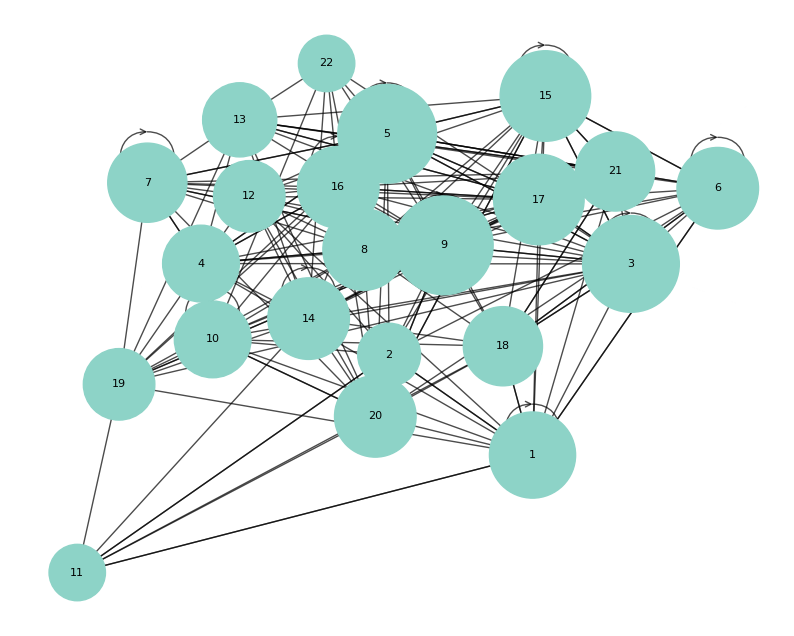

In [9]:
# Cell 6: static visualization of a subgraph using matplotlib
import matplotlib.pyplot as plt

# Pick a subgraph: top nodes by degree union with their neighbors
top_nodes = [n for n, d in out_deg[:8]] + [n for n, d in in_deg[:8]]
top_nodes = list(dict.fromkeys(top_nodes))  # unique preserving order
sub_nodes = set(top_nodes)
for n in top_nodes:
    sub_nodes.update(list(G.successors(n))[:5])
    sub_nodes.update(list(G.predecessors(n))[:5])

SG = G.subgraph(list(sub_nodes)).copy()
print("Subgraph nodes:", SG.number_of_nodes(), "edges:", SG.number_of_edges())

plt.figure(facecolor="white", figsize=(10, 8))
pos = nx.spring_layout(SG, seed=42)
nx.draw_networkx_nodes(SG, pos, node_size=[50 + 200 * (SG.degree(n)) for n in SG.nodes()], node_color="C0")
nx.draw_networkx_edges(SG, pos, arrowstyle="->", arrowsize=10, alpha=0.7)
nx.draw_networkx_labels(SG, pos, font_size=8)
plt.axis("off")
plt.show()